<a href="https://colab.research.google.com/github/infeimkr/codeit_ai4/blob/main/02_AlexNet(%E1%84%89%E1%85%B5%E1%86%AF%E1%84%89%E1%85%B3%E1%86%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchinfo

## AlexNet 구현

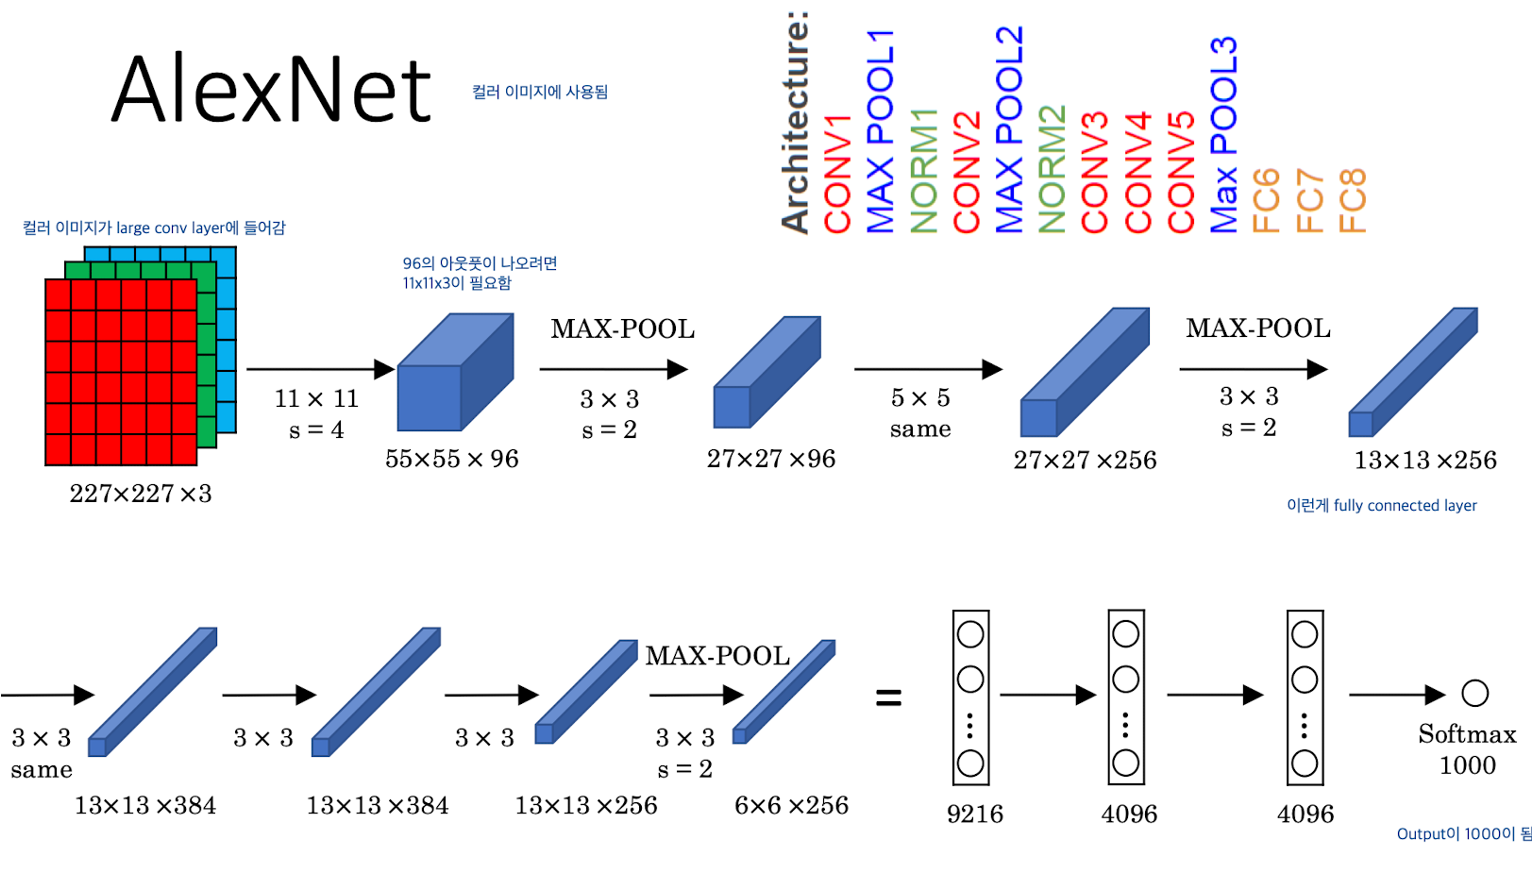

In [ ]:
import torch
import torch.nn as nn

class AlexNet(nn.Module):
    def __init__(self, num_classes=1000):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            # 첫 번째 Convolution: 입력 채널 3, 출력 채널 64, 커널 크기 11, stride 4, padding 2
            nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 두 번째 Convolution: 입력 64, 출력 192, 커널 크기 5, padding 2
            nn.Conv2d(64, 192, kernel_size=5, padding=2),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2),

            # 세 번째 Convolution: 입력 192, 출력 384, 커널 크기 3, padding 1
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # 네 번째 Convolution: 입력 384, 출력 256, 커널 크기 3, padding 1
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),

            # 다섯 번째 Convolution: 입력 256, 출력 256, 커널 크기 3, padding 1
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2)
        )

        # AdaptiveAvgPool를 사용하여 임의의 입력 크기에 대해 고정된 출력 크기 (6, 6)를 만듭니다.
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))

        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        # 첫 번째 차원을 제외하고 flatten합니다.
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

# 모델 인스턴스 생성 및 테스트 예시
if __name__ == '__main__':
    model = AlexNet(num_classes=1000)
    print(model)

    # 임의의 입력 (배치 크기 1, 채널 3, 224x224 이미지)
    x = torch.randn(1, 3, 224, 224)
    output = model(x)
    print("출력 크기:", output.shape)  # 예상 출력: torch.Size([1, 1000])


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

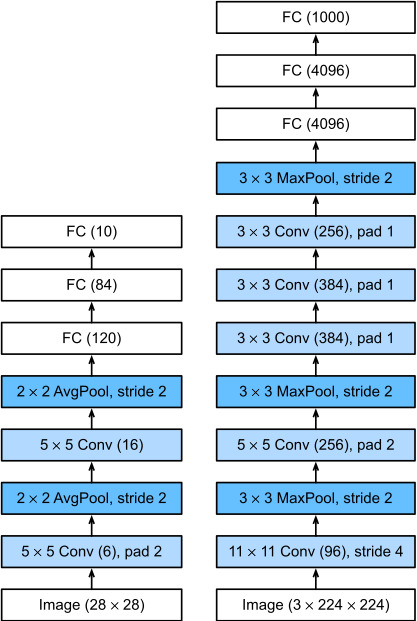

In [ ]:
from torchinfo import summary
summary(model, input_size = (1, 3, 224, 224 ))

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

## 사전 훈련된 모델 활용

파이토치에서 제공하는 알렉스넷 모델 : https://pytorch.org/vision/main/models/generated/torchvision.models.alexnet.html

  

위의 모델 빌더는 **weights(가중치) 매개변수**로 다음 값을 허용합니다.  
**`AlexNet_Weights.DEFAULT`**는 **`AlexNet_Weights.IMAGENET1K_V1`**과 동일합니다.  
또한 문자열을 사용할 수도 있으며, 예를 들어 **`weights='DEFAULT'`** 또는 **`weights='IMAGENET1K_V1'`**처럼 지정할 수 있습니다.  

---

### **AlexNet_Weights.IMAGENET1K_V1:**
이 가중치는 논문의 결과를 간단한 학습 방법을 사용하여 거의 동일하게 재현한 것입니다.  
또한 **`AlexNet_Weights.DEFAULT`**로도 제공됩니다.  

#### **모델 성능 (ImageNet-1K 기준)**
- **Top-1 정확도 (acc@1):** 56.522%  
- **Top-5 정확도 (acc@5):** 79.066%  
- **총 파라미터 수:** 61,100,840  
- **최소 입력 이미지 크기:** 높이 63px, 너비 63px  
- **분류 가능한 카테고리:**  
  - 예시: **tench(숭어), goldfish(금붕어), great white shark(백상아리)** 등 (총 1000개 중 997개 생략)  
- **학습 방법 (recipe):** 링크 제공  
- **연산량 (GFLOPS):** 0.71 GFLOPS (1초당 약 7,100만 개의 부동소수점 연산 수행)  
- **모델 파일 크기:** 233.1MB  

---

### **추론(Inference) 변환**
**`AlexNet_Weights.IMAGENET1K_V1.transforms`**에서 제공하는 변환(transforms)은 다음과 같은 전처리 과정을 수행합니다.  

1. **입력 형식:**  
   - `PIL.Image` 객체  
   - 배치(batch) 형식: `(B, C, H, W)`  
   - 단일(single) 이미지 형식: `(C, H, W)`

2. **이미지 전처리 과정:**  
   - **리사이징(resizing):**  
     - **크기:** `resize_size=[256]`  
     - **보간법(interpolation):** `InterpolationMode.BILINEAR(양선형 보간법)` 사용  
   - **중앙 크롭(central crop):**  
     - **크기:** `crop_size=[224]`  
   - **정규화(normalization):**  
     - 픽셀 값 범위 변환: `[0.0, 1.0]`로 리스케일  
     - 평균(mean) 및 표준 편차(std) 사용하여 정규화  
       - **평균(mean):** `[0.485, 0.456, 0.406]`  
       - **표준 편차(std):** `[0.229, 0.224, 0.225]`  

이러한 전처리는 모델이 학습된 데이터와 동일한 입력 형태를 유지하도록 하기 위해 필요합니다.

In [ ]:
# 모델 구조
from torchvision import models

model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

In [ ]:
summary(model, (1, 3, 224, 224), device='cpu')

Layer (type:depth-idx)                   Output Shape              Param #
AlexNet                                  [1, 1000]                 --
├─Sequential: 1-1                        [1, 256, 6, 6]            --
│    └─Conv2d: 2-1                       [1, 64, 55, 55]           23,296
│    └─ReLU: 2-2                         [1, 64, 55, 55]           --
│    └─MaxPool2d: 2-3                    [1, 64, 27, 27]           --
│    └─Conv2d: 2-4                       [1, 192, 27, 27]          307,392
│    └─ReLU: 2-5                         [1, 192, 27, 27]          --
│    └─MaxPool2d: 2-6                    [1, 192, 13, 13]          --
│    └─Conv2d: 2-7                       [1, 384, 13, 13]          663,936
│    └─ReLU: 2-8                         [1, 384, 13, 13]          --
│    └─Conv2d: 2-9                       [1, 256, 13, 13]          884,992
│    └─ReLU: 2-10                        [1, 256, 13, 13]          --
│    └─Conv2d: 2-11                      [1, 256, 13, 13]         

- 토치비전 라이브러리를 활용해 이미지넷으로 사전학습된 알렉스넷 모델을 불러옴.
- 이미지넷은 1000개의 클래스로 구성된 데이터셋이므로, 이 모델은 1000개 클래스에 대한 예측을 수행

In [ ]:
# 클래스 정보 파일 불러오기
# https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

import requests

# URL 설정
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"

# 요청하여 파일 불러오기
response = requests.get(url)

# 텍스트 데이터를 리스트로 변환 (각 줄을 요소로 저장)
imagenet_classes = response.text.strip().split("\n")

# 결과 확인 (앞부분 10개 출력)
print(imagenet_classes)  # ['tench, Tinca tinca', 'goldfish, Carassius auratus', ...]


['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich', 'brambling', 'goldfinch', 'house finch', 'junco', 'indigo bunting', 'robin', 'bulbul', 'jay', 'magpie', 'chickadee', 'water ouzel', 'kite', 'bald eagle', 'vulture', 'great grey owl', 'European fire salamander', 'common newt', 'eft', 'spotted salamander', 'axolotl', 'bullfrog', 'tree frog', 'tailed frog', 'loggerhead', 'leatherback turtle', 'mud turtle', 'terrapin', 'box turtle', 'banded gecko', 'common iguana', 'American chameleon', 'whiptail', 'agama', 'frilled lizard', 'alligator lizard', 'Gila monster', 'green lizard', 'African chameleon', 'Komodo dragon', 'African crocodile', 'American alligator', 'triceratops', 'thunder snake', 'ringneck snake', 'hognose snake', 'green snake', 'king snake', 'garter snake', 'water snake', 'vine snake', 'night snake', 'boa constrictor', 'rock python', 'Indian cobra', 'green mamba', 'sea snake', 'horned viper', 'diamondback', 

In [ ]:
print("클래스 개수 : ", len(imagenet_classes))

클래스 개수 :  1000


### 모델 활용하기

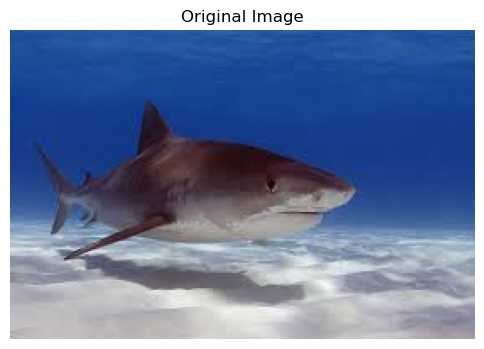

Top 5 예측 결과:
tiger shark: 0.9963
hammerhead: 0.0018
great white shark: 0.0009
dugong: 0.0003
axolotl: 0.0003


In [ ]:
import torch
from torchvision import models, transforms
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt


# 1. 이미지 다운로드 및 로드
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQPqUIvVs_Q2veVfJXJgmU4HqJDedpaLTb5Vg&s'
response = requests.get(url)
img = Image.open(BytesIO(response.content)).convert('RGB')  # 확실한 RGB 변환

# 이미지 시각화 (원본 이미지)
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")
plt.show()

# 2. 전처리: AlexNet은 ImageNet 기준으로 학습되었으므로, 해당 전처리 과정을 사용합니다.
preprocess = transforms.Compose([
    transforms.Resize(256),               # 짧은 변을 256픽셀로 조정
    transforms.CenterCrop(224),           # 정중앙에서 224x224 크롭
    transforms.ToTensor(),                # 텐서 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet 평균
                         std=[0.229, 0.224, 0.225])   # ImageNet 표준편차
])

img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)  # 배치 차원 추가

# 3. 모델 로드 및 평가 모드 설정
model = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')
model.eval()  # 평가 모드로 전환

# 4. 추론 진행 (with torch.no_grad()로 gradient 계산 방지)
with torch.no_grad():
    output = model(batch_t)

# 5. softmax를 통해 클래스 확률 계산 및 Top5 예측
probabilities = torch.nn.functional.softmax(output[0], dim=0)
top5_prob, top5_catid = torch.topk(probabilities, 5)

print("Top 5 예측 결과:")
for i in range(top5_prob.size(0)):
    print(f"{imagenet_classes[top5_catid[i]]}: {top5_prob[i].item():.4f}")


# 실습

## CIFAR-10 데이터셋을 활용한 AlexNet 모델 학습 및 평가

### 실습 목표
- **AlexNet 모델**을 활용하여 CIFAR-10 데이터셋에 대해 학습 및 평가해보고,
- **세 가지 전략**(From Scratch, Feature Extraction, Fine-tuning)의 성능 차이를 비교해봅니다.
- 학습 과정에서 **loss**와 **accuracy** 변화를 시각화하여 모델의 학습 추세를 분석합니다.

### 실습 단계
1. **환경 설정 및 코드 실행 준비**  
   - 위에 제공된 전체 코드를 하나의 Python 파일(예: `cifar10_alexnet.py`)에 복사합니다.
   - 필요한 라이브러리가 모두 설치되어 있는지 확인합니다.

2. **데이터셋 다운로드 및 전처리**  
   - 코드를 실행하면 자동으로 CIFAR-10 데이터셋을 다운로드합니다.
   - 전처리 단계(Resize, RandomHorizontalFlip, ToTensor, Normalize)의 역할을 이해하고, 필요시 각 단계의 파라미터를 변경해볼 수 있습니다.

3. **세 가지 모델 전략 학습**  
   - 각 전략(Feature Extraction, Fine-tuning, From Scratch) 별로 학습을 진행하면서, 에포크마다 출력되는 loss, accuracy, 학습 시간 등을 확인합니다.
   - **업데이트 되는 파라미터 개수**도 확인해보며, 학습 대상이 어떻게 달라지는지 살펴봅니다.
   - 에포크별 **train loss**, **validation loss** 및 **accuracy**를 두 개의 subplot으로 시각화하여 모델 성능을 비교합니다.

4. **시각화 결과 분석**  
   - 학습이 완료되면 생성된 Plot을 통해 각 모델의 학습 추세를 비교합니다.
   - Train/Validation Loss 및 Accuracy의 변화 패턴을 분석하고, 각 전략의 장단점을 토의합니다.

5. **실습 확장 및 토의**
   - 학습률(lr)이나 배치 크기(batch size) 등 하이퍼파라미터를 조정해보고 성능에 어떤 영향을 미치는지 실험해봅니다.
   - 다른 데이터 증강 기법이나 optimizer(SGD 외 다른 옵티마이저)를 적용해 결과를 비교해봅니다.
   - 왜 Feature Extraction과 Fine-tuning 전략이 성능 차이를 보이는지 생각을 정리해보세요.



참고 자료

- [torchvision.models 문서](https://pytorch.org/vision/stable/models.html): pretrained 모델 및 사용법
- [CIFAR-10 데이터셋 정보](https://www.cs.toronto.edu/~kriz/cifar.html)



-------------------------------------------------------------------------------------------

In [ ]:
# 이미지 시각화를 위한 함수 (단일 이미지 표시용)
def imshow(img, title=None, cmap=None):
    npimg = img.numpy()
    if npimg.shape[0] == 1:  # 흑백 이미지의 경우
        npimg = npimg[0]
    else:
        npimg = np.transpose(npimg, (1, 2, 0))
    plt.imshow(npimg, cmap=cmap)
    if title:
        plt.title(title)
    plt.axis('off')


def print_dataset_info(name, train_set, test_set):
    sample_img, sample_label = train_set[0]
    print(f"========== {name} ==========")
    print("Train 샘플 개수:", len(train_set))
    print("Test 샘플 개수:", len(test_set))
    print("샘플 이미지 텐서 shape:", sample_img.shape)  # (채널, 높이, 너비)
    if hasattr(train_set, 'classes'):
        print("클래스 (카테고리) 개수:", len(train_set.classes))
        print("클래스 이름:", train_set.classes)
    print()


def visualize_one_per_category(dataset, dataset_name="Dataset", cmap=None):
    """
    각 카테고리에서 1개의 샘플 이미지를 수집하여 한 화면에 grid로 시각화합니다.
    - dataset: torchvision 데이터셋 (transform이 적용된 상태)
    - dataset_name: 데이터셋 이름 (출력 제목에 사용)
    - cmap: 흑백일 경우 'gray' 지정
    """
    samples = {}  # key: label, value: 이미지 텐서

    # dataset.targets (또는 train_labels)를 통해 클래스 정보를 확인
    targets = dataset.targets if hasattr(dataset, 'targets') else dataset.train_labels

    for idx in range(len(dataset)):
        img, label = dataset[idx]
        # label이 tensor인 경우 정수형으로 변환
        if torch.is_tensor(label):
            label = label.item()
        if label not in samples:
            samples[label] = img
        if len(samples) >= len(dataset.classes):
            break

    n_categories = len(dataset.classes)
    print(f"{dataset_name} 카테고리 개수: {n_categories}")

    # Grid 배치를 위해 (예: 10열로 배치)
    cols = 10 if n_categories >= 10 else n_categories
    rows = math.ceil(n_categories / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    # axes가 2차원 배열인 경우 flatten하여 사용
    if rows * cols > 1:
        axes = axes.flatten()
    else:
        axes = [axes]

    # 클래스 id 오름차순으로 정렬하여 시각화
    for i, label in enumerate(sorted(samples.keys())):
        ax = axes[i]
        img = samples[label]
        npimg = img.numpy()
        if npimg.shape[0] == 1:  # 흑백 이미지
            npimg = npimg[0]
            ax.imshow(npimg, cmap=cmap)
        else:
            npimg = np.transpose(npimg, (1, 2, 0))
            ax.imshow(npimg)
        class_name = dataset.classes[label] if hasattr(dataset, 'classes') else str(label)
        ax.set_title(class_name, fontsize=8)
        ax.axis('off')

    # 남은 subplot 축 숨기기 (있을 경우)
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.suptitle(f"{dataset_name} - 1 sample per category", fontsize=14)
    plt.tight_layout()
    plt.show()

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torch.optim as optim
import numpy as np
import math
from torch.utils.data import DataLoader, random_split
from tqdm import tqdm  # 진행 상황을 표시하기 위한 라이브러리
import torch.nn as nn
from torchvision import models

In [ ]:
# CIFAR-10에서 사용하는 normalize 값
cifar10_mean = [0.4914, 0.4822, 0.4465]
cifar10_std  = [0.2023, 0.1994, 0.2010]

transform_cifar = transforms.Compose([
    transforms.Resize(256),               # 짧은 변을 256픽셀로 조정
    transforms.CenterCrop(224),           # 정중앙에서 224x224 크롭
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(cifar10_mean, cifar10_std)  # 옵션: CIFAR-10 정규화
])

transform_test = transforms.Compose([
    transforms.Resize(256),
    transforms.ToTensor(),
])

cifar_train = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_cifar)
cifar_test  = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
print(f'학습 데이터 개수: {len(cifar_train)}')
print(f'테스트 데이터 개수: {len(cifar_test)}')

학습 데이터 개수: 50000
테스트 데이터 개수: 10000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.378921..2.734221].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4290657..2.5976489].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2352166..2.4394557].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.099522..1.9733196].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1232522..2.107005].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.4182549..2.0318506].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1822526..2

========== CIFAR10 ==========
Train 샘플 개수: 50000
Test 샘플 개수: 10000
샘플 이미지 텐서 shape: torch.Size([3, 224, 224])
클래스 (카테고리) 개수: 10
클래스 이름: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

CIFAR10 카테고리 개수: 10


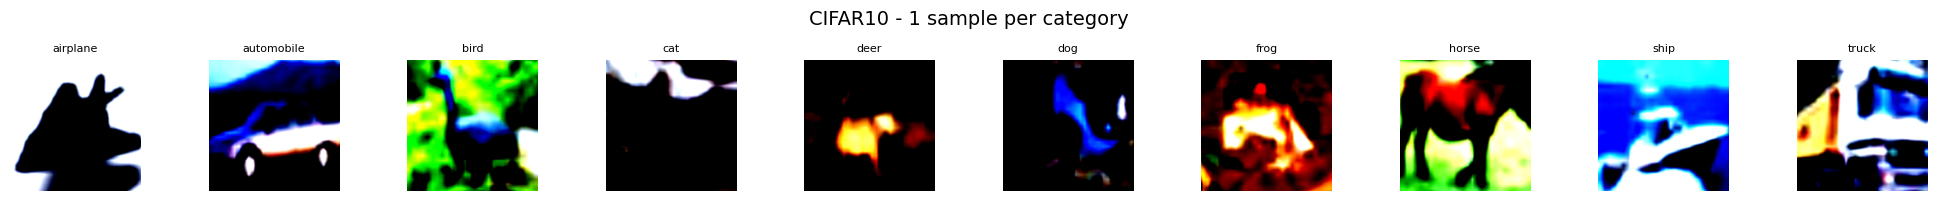

In [ ]:
print_dataset_info("CIFAR10", cifar_train, cifar_test)
visualize_one_per_category(cifar_train, dataset_name="CIFAR10", cmap=None)

 - 랜덤트랜스폼 잘 적용되나 확인

CIFAR10 카테고리 개수: 10


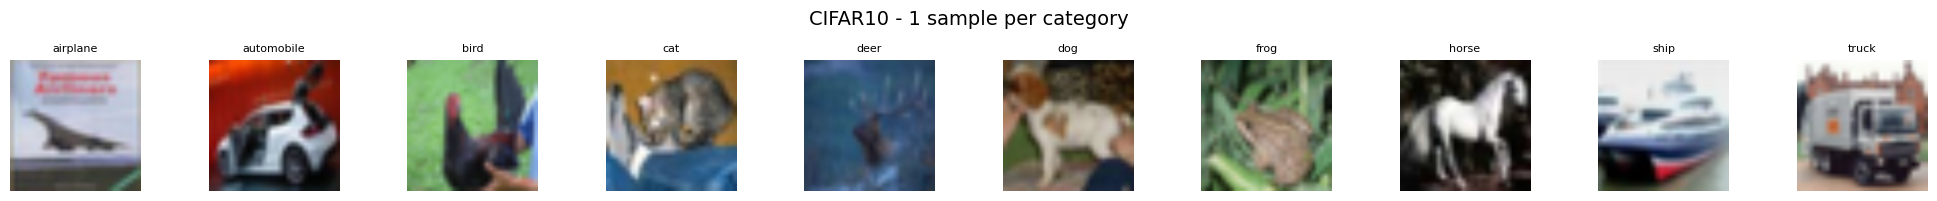

In [ ]:
visualize_one_per_category(cifar_test, dataset_name="CIFAR10", cmap=None)

In [ ]:
data_item = cifar_train[0][0]
print(data_item)

tensor([[[-0.1029, -0.1029, -0.1029,  ..., -1.8281, -1.9057, -1.9638],
         [-0.1029, -0.1029, -0.1223,  ..., -1.7700, -1.8281, -1.9057],
         [-0.1223, -0.1029, -0.1223,  ..., -1.6924, -1.7700, -1.8475],
         ...,
         [-0.0835,  0.1491,  0.4011,  ...,  1.3704,  1.3704,  1.3510],
         [-0.0060,  0.2267,  0.4593,  ...,  1.3316,  1.3316,  1.3122],
         [ 0.0716,  0.3042,  0.5368,  ...,  1.2928,  1.2928,  1.2735]],

        [[-0.7466, -0.7466, -0.7466,  ..., -2.1036, -2.1429, -2.1823],
         [-0.7466, -0.7466, -0.7466,  ..., -2.0643, -2.1036, -2.1429],
         [-0.7662, -0.7662, -0.7466,  ..., -2.0249, -2.0643, -2.1036],
         ...,
         [-0.6089, -0.3532, -0.1172,  ...,  0.6498,  0.6301,  0.6104],
         [-0.5499, -0.3139, -0.0582,  ...,  0.6104,  0.5711,  0.5514],
         [-0.4909, -0.2549, -0.0189,  ...,  0.5514,  0.5121,  0.4924]],

        [[-1.2264, -1.2264, -1.2069,  ..., -2.1434, -2.1629, -2.1629],
         [-1.2264, -1.2264, -1.2264,  ..., -2

In [ ]:
cifar_train[0][0].shape

torch.Size([3, 224, 224])

In [ ]:
# Denormalize 함수
def denormalize(img, mean, std):
    """
    img: Tensor (C,H,W) 또는 (H,W,C)
    mean, std: 리스트 (채널별 평균, 표준편차)
    """
    mean = torch.tensor(mean)
    std = torch.tensor(std)
    img = img * std + mean   # 역정규화
    return img.clamp(0, 1)   # 값 범위를 [0,1]로 제한

# 결과 시각화 (테스트 샘플)
def visualize_predictions(model, test_loader, classes, mean, std, device):
    model.eval()
    inputs, labels = next(iter(test_loader))
    inputs, labels = inputs.to(device), labels.to(device)

    with torch.no_grad():
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

    inputs = inputs.cpu()
    preds = preds.cpu()
    labels = labels.cpu()

    fig, axes = plt.subplots(1, 6, figsize=(15, 5))
    for i in range(6):
        img = inputs[i].permute(1, 2, 0)  # (C,H,W) → (H,W,C)
#        img = denormalize(img, mean, std) # 역정규화
        axes[i].imshow(img)
        axes[i].set_title(f"Pred: {classes[preds[i]]}\nTrue: {classes[labels[i]]}")
        axes[i].axis("off")
    plt.show()

# 클래스 이름
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
train_size = int(0.9 * len(cifar_train))
val_size = len(cifar_train) - train_size
cifar10_train, cifar10_val = random_split(cifar_train, [train_size, val_size])
cifar10_train_loader = DataLoader(cifar10_train, batch_size=128, shuffle=True, num_workers=2)
cifar10_val_loader = DataLoader(cifar10_val, batch_size=128, shuffle=False, num_workers=2)

cifar10_test_loader = DataLoader(cifar_test, batch_size=128, shuffle=False, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("사용 device:", device)

사용 device: cuda


In [ ]:
# 학습 & 검증 함수
def train_epoch(model, dataloader, criterion, optimizer, train_losses, train_accs):
    model.train()

    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(dataloader, leave=False, desc="Train"):
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    return epoch_loss, epoch_acc, train_losses, train_accs

def validate_epoch(model, dataloader, criterion, val_losses, val_accs):
    model.eval

    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(dataloader, leave=False, desc="Val"):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            correct += (preds == labels).sum().item()
            total += labels.size(0)

    epoch_loss = running_loss / total
    epoch_acc = 100 * correct / total
    val_losses.append(epoch_loss)
    val_accs.append(epoch_acc)
    return epoch_loss, epoch_acc, val_losses, val_accs

# 학습 과정 시각화
def plot_loss_acc(train_losses, train_accs, val_losses, val_accs):
    epochs = range(1, len(train_losses) + 1)
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(epochs, train_accs, label='Train Acc')
    plt.plot(epochs, val_accs, label='Val Acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# 1. Training from scratch

전략 1: Training from scratch

[Epoch 1/5]



Train Loss: 2.3013 / Acc: 11.2222
Val   Loss: 2.2988 / Acc: 12.0000

[Epoch 2/5]



Train Loss: 2.2668 / Acc: 12.7667
Val   Loss: 2.2001 / Acc: 17.4800

[Epoch 3/5]



Train Loss: 2.0885 / Acc: 24.1933
Val   Loss: 2.0182 / Acc: 27.7200

[Epoch 4/5]



Train Loss: 1.9689 / Acc: 27.8733
Val   Loss: 1.9139 / Acc: 30.6800

[Epoch 5/5]



Train Loss: 1.8210 / Acc: 33.3000
Val   Loss: 1.7384 / Acc: 36.7400


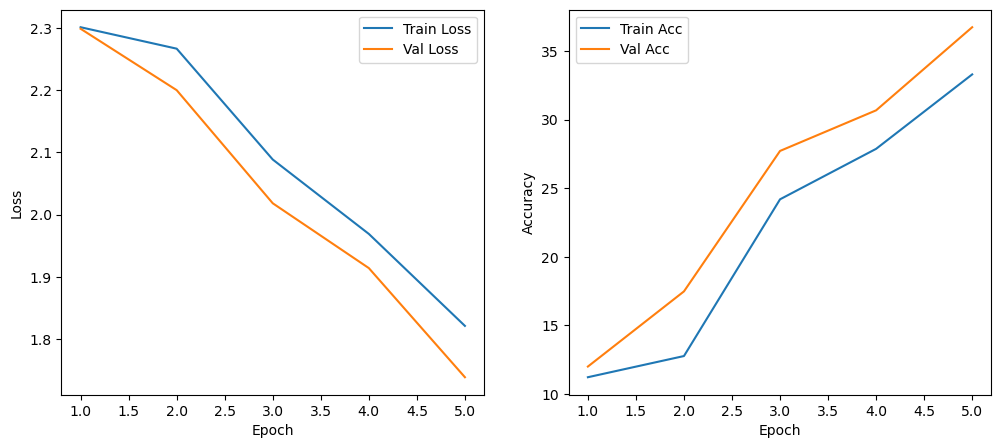

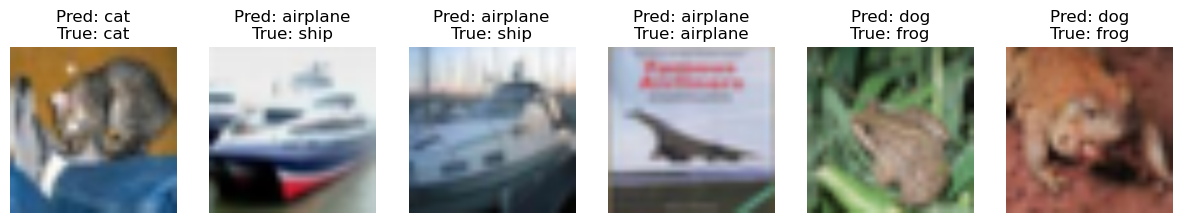

In [ ]:
# Training from scratch CIFAR-10 학습 (예시로 5 에폭 진행)
print('전략 1: Training from scratch')

# model_cifar10_FS (Training from scratch)
model_cifar10_FS = models.alexnet(weights=None)

criterion = nn.CrossEntropyLoss()
optimizer_cifar = optim.SGD(model_cifar10_FS.parameters(), lr=0.001, momentum=0.9)

model_cifar10_FS.classifier[6] = nn.Linear(model_cifar10_FS.classifier[6].in_features, 10) # 데이터셋에 맞게
model_cifar10_FS = model_cifar10_FS.to(device)

num_epochs = 5
train_losses, train_accs = [], []
val_losses, val_accs = [], []
for epoch in range(num_epochs):
    print(f"\n[Epoch {epoch+1}/{num_epochs}]")
    train_loss, train_acc, train_losses, train_accs = train_epoch(model_cifar10_FS, cifar10_train_loader, criterion, optimizer_cifar, train_losses, train_accs)
    val_loss, val_acc, val_losses, val_accs = validate_epoch(model_cifar10_FS, cifar10_val_loader, criterion, val_losses, val_accs)

    print(f"\nTrain Loss: {train_loss:.4f} / Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} / Acc: {val_acc:.4f}")

plot_loss_acc(train_losses, train_accs, val_losses, val_accs)
visualize_predictions(model_cifar10_FS, cifar10_test_loader, classes, cifar10_mean, cifar10_std, device)

# 2. Training Feature Extraction

전략 2: Feature Extraction

[Epoch 1/5]



Train Loss: 1.3175 / Acc: 57.9133
Val   Loss: 0.9826 / Acc: 68.4600

[Epoch 2/5]



Train Loss: 0.9317 / Acc: 69.3556
Val   Loss: 0.8646 / Acc: 71.4800

[Epoch 3/5]



Train Loss: 0.8490 / Acc: 71.4156
Val   Loss: 0.8166 / Acc: 72.9400

[Epoch 4/5]



Train Loss: 0.8070 / Acc: 72.3489
Val   Loss: 0.7892 / Acc: 73.6000

[Epoch 5/5]



Train Loss: 0.7802 / Acc: 73.3000
Val   Loss: 0.7658 / Acc: 73.7600


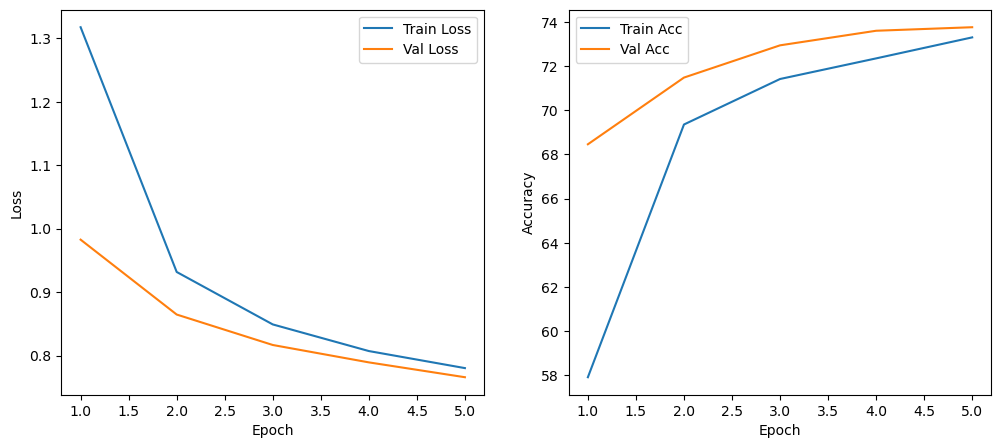

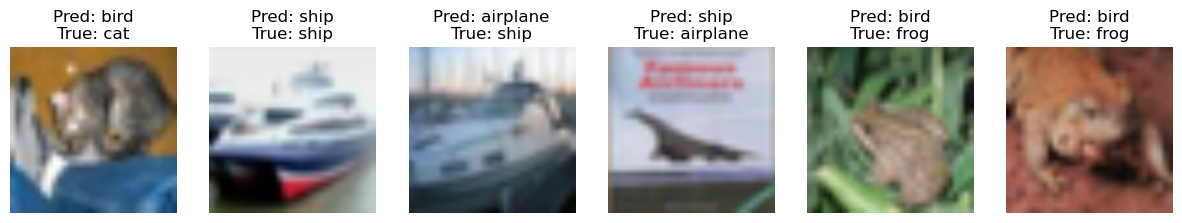

In [ ]:
# Training Feature Extraction CIFAR-10 학습
print('전략 2: Feature Extraction')

# model_cifar10_FE (Training Feature Extraction)
model_cifar10_FE = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')

criterion = nn.CrossEntropyLoss()
for param in model_cifar10_FE.parameters():
    param.requires_grad = False           # 모든 레이어 동결

model_cifar10_FE.classifier[6] = nn.Linear(model_cifar10_FE.classifier[6].in_features, 10) # 데이터셋에 맞게

optimizer_cifar = optim.SGD(model_cifar10_FE.classifier[6].parameters(), lr=0.0001, momentum=0.9) # classifier 만 새로 바껴서 param.requires_grad = True 처리됨
model_cifar10_FE = model_cifar10_FE.to(device)

train_losses, train_accs = [], []
val_losses, val_accs = [], []
for epoch in range(num_epochs):
    print(f"\n[Epoch {epoch+1}/{num_epochs}]")
    train_loss, train_acc, train_losses, train_accs = train_epoch(model_cifar10_FE, cifar10_train_loader, criterion, optimizer_cifar, train_losses, train_accs)
    val_loss, val_acc, val_losses, val_accs = validate_epoch(model_cifar10_FE, cifar10_val_loader, criterion, val_losses, val_accs)

    print(f"\nTrain Loss: {train_loss:.4f} / Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} / Acc: {val_acc:.4f}")

plot_loss_acc(train_losses, train_accs, val_losses, val_accs)
visualize_predictions(model_cifar10_FE, cifar10_test_loader, classes, cifar10_mean, cifar10_std, device)

# 3. Training Fine-tuning

전략 3: Fine-tuning

[Epoch 1/5]



Train Loss: 1.1279 / Acc: 60.8800
Val   Loss: 0.7349 / Acc: 74.0600

[Epoch 2/5]



Train Loss: 0.6658 / Acc: 76.5356
Val   Loss: 0.6057 / Acc: 78.8800

[Epoch 3/5]



Train Loss: 0.5793 / Acc: 79.6622
Val   Loss: 0.5623 / Acc: 80.2400

[Epoch 4/5]



Train Loss: 0.5362 / Acc: 81.2689
Val   Loss: 0.5453 / Acc: 81.5800

[Epoch 5/5]



Train Loss: 0.5014 / Acc: 82.3711
Val   Loss: 0.5199 / Acc: 82.0200


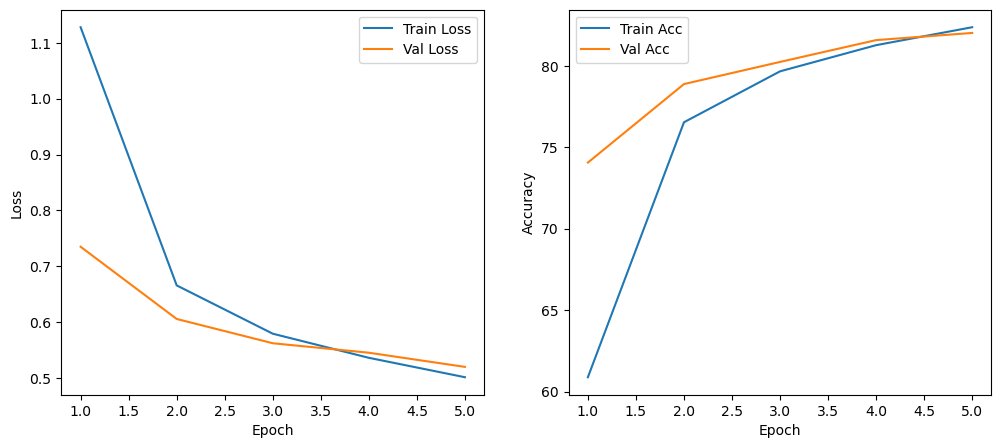

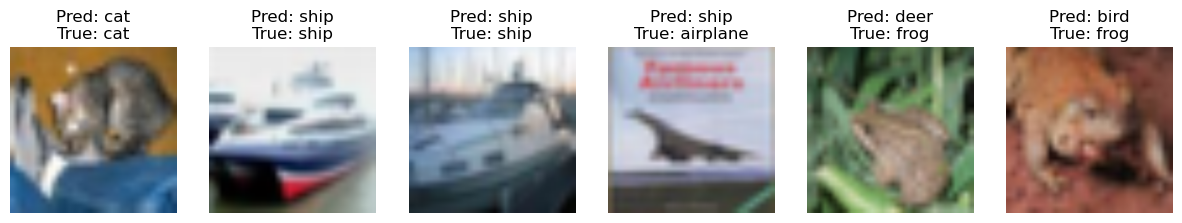

In [ ]:
# Training Fine-tuning CIFAR-10 학습 (예시로 5 에폭 진행)
print('전략 3: Fine-tuning')

# model_cifar10_FT (Training Fine-tuning)
model_cifar10_FT = models.alexnet(weights='AlexNet_Weights.IMAGENET1K_V1')

criterion = nn.CrossEntropyLoss()
for param in model_cifar10_FT.parameters():
    param.requires_grad = True

model_cifar10_FT.classifier[6] = nn.Linear(model_cifar10_FT.classifier[6].in_features, 10) # 데이터셋에 맞게

optimizer_cifar = optim.SGD(model_cifar10_FT.parameters(), lr=0.0001, momentum=0.9)
model_cifar10_FT = model_cifar10_FT.to(device)

train_losses, train_accs = [], []
val_losses, val_accs = [], []
for epoch in range(num_epochs):
    print(f"\n[Epoch {epoch+1}/{num_epochs}]")
    train_loss, train_acc, train_losses, train_accs = train_epoch(model_cifar10_FT, cifar10_train_loader, criterion, optimizer_cifar, train_losses, train_accs)
    val_loss, val_acc, val_losses, val_accs = validate_epoch(model_cifar10_FT, cifar10_val_loader, criterion, val_losses, val_accs)

    print(f"\nTrain Loss: {train_loss:.4f} / Acc: {train_acc:.4f}")
    print(f"Val   Loss: {val_loss:.4f} / Acc: {val_acc:.4f}")

plot_loss_acc(train_losses, train_accs, val_losses, val_accs)
visualize_predictions(model_cifar10_FT, cifar10_test_loader, classes, cifar10_mean, cifar10_std, device)